In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


In [2]:
stc = pd.read_csv('/Users/dinaabed/Desktop/Final_Dataset.txt', delimiter = ",")

In [3]:
stc = stc.drop('Unnamed: 0', axis=1)
# to create a unique id for videos
df = stc.copy()
df['vid_id'] = df.groupby(['original_name']).ngroup()
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,vid_id
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,2
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana,924
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,1524
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,1524
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill,317


In [19]:
df.sample()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,vid_id,year,month
2403103,2017-07-14,20638,Slugterra The lug Out,1271,SERIES/EPISODES,1,4,Animation MovieThe Slug Out (HD),Animation,0,0,Slugterra,1231,2017,7


In [4]:
stc.columns


Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

In [5]:
df.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name', 'vid_id'],
      dtype='object')

In [6]:
# create date year and months
df['year']  =  [int(x[:4]) for x in df['date_']]
df['month'] = [int(x[5:7]) for x in df['date_']]
df['date_']  = pd.to_datetime(df.date_,format='%Y/%m/%d')

In [7]:
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,vid_id,year,month
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,2,2017,5
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana,924,2017,5
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,1524,2017,8
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,1524,2017,7
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill,317,2017,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598607 entries, 0 to 3598606
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date_             datetime64[ns]
 1   user_id_maped     int64         
 2   program_name      object        
 3   duration_seconds  int64         
 4   program_class     object        
 5   season            int64         
 6   episode           int64         
 7   program_desc      object        
 8   program_genre     object        
 9   series_title      int64         
 10  hd                int64         
 11  original_name     object        
 12  vid_id            int64         
 13  year              int64         
 14  month             int64         
dtypes: datetime64[ns](1), int64(9), object(5)
memory usage: 411.8+ MB


In [9]:
# check for nulls
df.isna().sum()

date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        43965
program_genre           0
series_title            0
hd                      0
original_name           0
vid_id                  0
year                    0
month                   0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


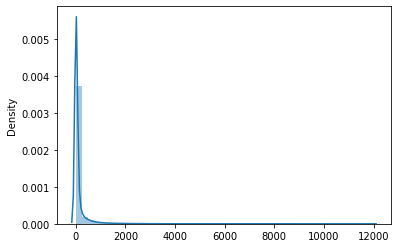

In [42]:
activ = df.groupby(by='user_id_maped')['vid_id'].count()
outlier = activ.values
x = sns.distplot(outlier)

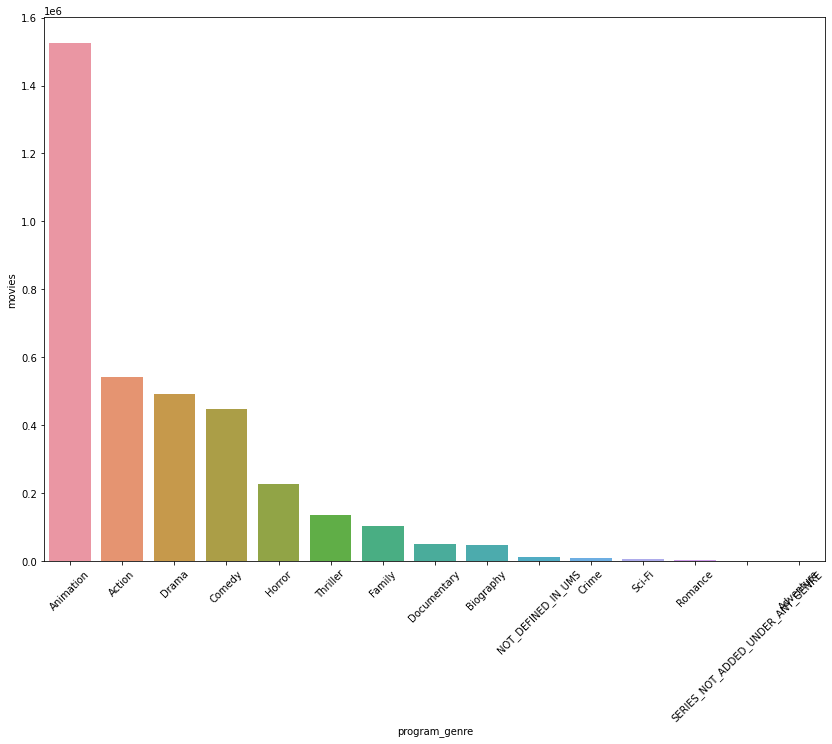

In [36]:

genres = df.program_genre.value_counts()
genres_count = pd.DataFrame(df.program_genre.value_counts()).reset_index()
genres_count.columns = ['program_genre', 'movies']
genres_count = genres_count.sort_values(['movies'], ascending=False)
plt.figure(figsize=(14, 10))
g = sns.barplot(x='program_genre', y='movies', data=genres_count.head(15))
plt.setp(g.get_xticklabels(), rotation=45);